In [14]:
import igraph as ig
import numpy as np
import pandas as pd
from time import time
import math
import matplotlib.pyplot as plt
from auxiliar_bb import noise_corrected, disparity
from auxiliar_projections_large import apply_projection

In [99]:
FILENAME = "binet-AMZ-Rw.graphml"
PROJ_NAME = ["simple", "weights", "jaccard", "master", "hyper", "resall"]

In [100]:
###### ****** Read BI GRAPH ****** ######
g = ig.read(FILENAME)
print(g.summary())
print()

user_nodes = g.vs.select(type=0)
res_nodes = g.vs.select(type=1)

if(g.is_bipartite()): # Check if the the graph is bipartite
    print("The graph IS bipartite")
else:
    print("The graph IS NOT bipartite")
    exit()
print("|U|=",len(user_nodes), " \t|R|=",len(res_nodes), " \t|U|+|R|=",
      len(user_nodes)+len(res_nodes), "=", g.vcount())
print()
###### ****** END ****** ######

IGRAPH U-WT 17079 32769 -- 
+ attr: freq (v), id (v), type (v), weight (e)

The graph IS bipartite
|U|= 9561  	|R|= 7518  	|U|+|R|= 17079 = 17079



/Users/ddiaz/Documents/code/envs/tesis/lib/python3.10/site-packages/igraph/io/files.py:295: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:485
  return reader(f, *args, **kwds)


In [ ]:
for proj_opcion in PROJ_NAME:
    ###### ****** Projections ****** ######
    user_graph = apply_projection(g, proj_opcion,
                                len(user_nodes), False) # False = Users = 0
    print("Done PROJ1 - Users Projection")
    edges_temp = user_graph.es()["weight"]
    print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")

    rsrs_graph = apply_projection(g, proj_opcion,
                                len(user_nodes), True) # True = Resources = 1
    print("\nDone PROJ2 - Resources Projection")
    edges_temp = rsrs_graph.es()["weight"]
    print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")
    print()
    ###### ****** END ****** ######

In [61]:
###### ****** Projections ****** ######
user_graph = apply_projection(g, PROJ_NAME,
                              len(user_nodes), False) # False = Users = 0
print("Done PROJ1 - Users Projection")
edges_temp = user_graph.es()["weight"]
print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")

rsrs_graph = apply_projection(g, PROJ_NAME,
                              len(user_nodes), True) # True = Resources = 1
print("\nDone PROJ2 - Resources Projection")
edges_temp = rsrs_graph.es()["weight"]
print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")
print()
###### ****** END ****** ######

Done PROJ1 - Users Projection
Peso máximo=0.5 y mínimo=4.798289505756988e-05 en aristas: 

Done PROJ2 - Resources Projection
Peso máximo=0.1111111111111111 y mínimo=0.0 en aristas: 



<AxesSubplot: >

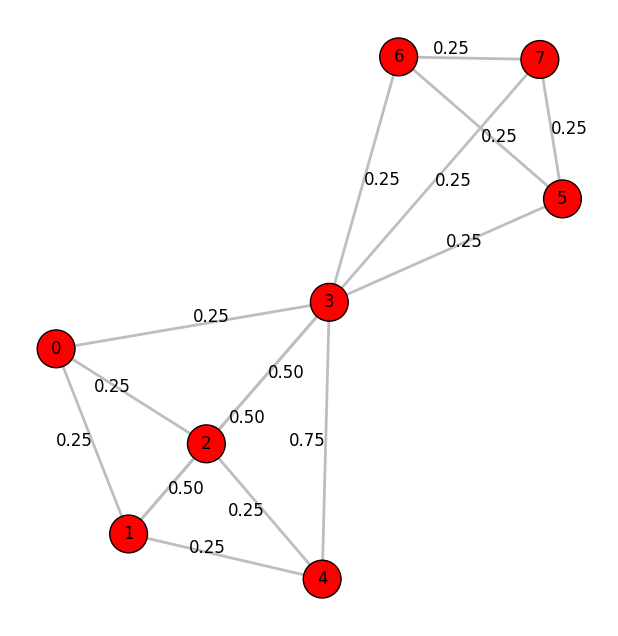

In [8]:
# Etiqueta para los nodos: Usaremos el índice del nodo
g = user_graph
# Puedes usar g.vs["name"] si prefieres mostrar los nombres asignados
g.vs["label"] = [str(i) for i in range(g.vcount())]

# Etiquetas para las aristas: Usaremos el peso de las aristas
# Formatear el peso para que no tenga demasiados decimales
g.es["label"] = [f"{w:.2f}" for w in g.es["weight"]]

# 2. Definir el layout del grafo
# El layout determina la posición de los nodos en el dibujo.
# Hay varios algoritmos disponibles:
# - 'auto': igraph intenta elegir el mejor.
# - 'kk': Kamada-Kawai (bueno para grafos con estructura).
# - 'fr': Fruchterman-Reingold (bueno para grafos generales).
# - 'circle': Nodos en un círculo.
# - 'grid': Nodos en una cuadrícula.
# - 'tree': Para árboles.
layout = g.layout("fr") # Usando el algoritmo Fruchterman-Reingold

# 3. Graficar el grafo
# Usamos el método plot de igraph, que internamente usa matplotlib.
fig, ax = plt.subplots(figsize=(8, 8)) # Crear una figura y ejes para mayor control

ig.plot(
    g,
    target=ax, # Especificar los ejes de matplotlib para dibujar
    layout=layout,
    vertex_label=g.vs["label"], # Mostrar el índice del nodo como etiqueta
    edge_label=g.es["label"],   # Mostrar el peso de la arista como etiqueta
    edge_color="gray",
    bbox=(600, 600), # Tamaño del bounding box para el dibujo
    margin=20, # Margen alrededor del grafo
    autocurve=True # Curvar las aristas si hay múltiples entre los mismos nodos
)


In [16]:
# Convertimos a dataframe
import backboning as bb_
import networkx as nx
import pandas as pd

G = nx.read_graphml("grafo_prueba.graphml")

edges = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
df = pd.DataFrame(edges, columns=["src", "trg", "nij"])

nc_edges = bb_.noise_corrected(df, undirected=True, calculate_p_value =True)
nc_edges

bb_.thresholding(nc_edges, 0.95)

Calculating NC score...


,src,trg,nij,score
0,n0,n1,14.0,1.000000
1,n0,n2,18.0,0.998610
3,n1,n2,35.0,1.000000
6,n2,n3,39.0,1.000000
7,n2,n4,24.0,0.996701
8,n3,n4,27.0,0.999731
9,n3,n5,13.0,0.999998
10,n3,n6,7.0,0.958646
12,n5,n6,10.0,0.999998
13,n5,n7,18.0,1.000000


In [20]:
nc_edges = bb_.noise_corrected(df, undirected=True, calculate_p_value =False)
nc_edges

bb_.thresholding(nc_edges, 0.05)

Calculating NC score...


,src,trg,nij,score
0,n0,n1,14.0,0.717868
1,n0,n2,18.0,0.348093
2,n0,n3,13.0,0.047339
3,n1,n2,35.0,0.477430
4,n1,n3,20.0,0.086439
6,n2,n3,39.0,0.404020
7,n2,n4,24.0,0.269988
8,n3,n4,27.0,0.330815
9,n3,n5,13.0,0.630952
10,n3,n6,7.0,0.290713


In [2]:
g = ig.read("grafo_prueba.graphml")
bb_nc = noise_corrected(g)
print(bb_nc[0.05])

IGRAPH U-WT 8 3 --
+ attr: frequency (v), id (v), label (v), type (v), weight (e)
+ edges:
5--6 5--7 6--7


/Users/ddiaz/Documents/code/envs/tesis/lib/python3.10/site-packages/igraph/io/files.py:295: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:488
  return reader(f, *args, **kwds)


In [24]:
import netbone as nb
import networkx as nx
G = nx.read_graphml("grafo_prueba.graphml")
b = nb.noise_corrected(G, approximation=True)
print(b.to_dataframe())

   source target  label  weight   p_value
0      n0     n1  14.00    14.0  0.302731
1      n0     n2  18.00    18.0  0.538628
2      n0     n3  13.00    13.0  0.976789
3      n1     n2  35.00    35.0  0.316252
4      n1     n3  20.00    20.0  0.999534
5      n1     n4   9.00     9.0  0.978166
6      n2     n3  39.00    39.0  0.996161
7      n2     n4  24.00    24.0  0.563619
8      n3     n4  27.00    27.0  0.632098
9      n3     n5  13.00    13.0  0.942155
10     n3     n6   7.00     7.0  0.974328
11     n3     n7  15.00    15.0  0.931612
12     n5     n6  10.00    10.0  0.004776
13     n5     n7  18.00    18.0  0.000061
14     n6     n7  12.00    12.0  0.001181


In [26]:
import netbone as nb
import networkx as nx
from netbone.filters import boolean_filter, threshold_filter, fraction_filter

G = nx.read_graphml("grafo_prueba.graphml")
b = nb.noise_corrected(G, approximation=False)
print(b.to_dataframe())

   source target   nc_sdev     score  label  weight
0      n0     n1  0.069134  0.044378  14.00    14.0
1      n0     n2  0.056772 -0.028369  18.00    18.0
2      n0     n3  0.095520 -0.257298  13.00    13.0
3      n1     n2  0.027387  0.029080  35.00    35.0
4      n1     n3  0.074740 -0.312076  20.00    20.0
5      n1     n4  0.135804 -0.309824   9.00     9.0
6      n2     n3  0.037223 -0.185208  39.00    39.0
7      n2     n4  0.045184 -0.028369  24.00    24.0
8      n3     n4  0.039340 -0.041586  27.00    27.0
9      n3     n5  0.090723 -0.213339  13.00    13.0
10     n3     n6  0.150776 -0.339076   7.00     7.0
11     n3     n7  0.079956 -0.189349  15.00    15.0
12     n5     n6  0.048304  0.394757  10.00    10.0
13     n5     n7  0.016342  0.455511  18.00    18.0
14     n6     n7  0.033796  0.431744  12.00    12.0


In [27]:
nc_edges = bb_.noise_corrected(df, undirected=True, calculate_p_value =False)
nc_edges

bb_.thresholding(nc_edges, 0.05)

Calculating NC score...


,src,trg,nij,score
0,n0,n1,14.0,0.717868
1,n0,n2,18.0,0.348093
2,n0,n3,13.0,0.047339
3,n1,n2,35.0,0.477430
4,n1,n3,20.0,0.086439
6,n2,n3,39.0,0.404020
7,n2,n4,24.0,0.269988
8,n3,n4,27.0,0.330815
9,n3,n5,13.0,0.630952
10,n3,n6,7.0,0.290713


In [12]:
from netbone.filters import boolean_filter, threshold_filter, fraction_filter

backbone1 = threshold_filter(b, 0.7)
print(backbone1)

Noise Corrected Filter
Graph with 8 nodes and 8 edges


In [48]:
min(edges_temp)

0.0

In [56]:
###### ****** BACKBONING USERS ****** ######
g_toy = user_graph.copy() # Graph to analyze
print("\n##### **** BACKBONING USERS **** #####")
print("Projection Name:", PROJ_NAME)
print("Summary\n",g_toy.summary())
print("##### END #####")
print()

### Factor de Escalado
edges_temp = g_toy.es["weight"]
print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")
print()

factor_escala = math.ceil(1 / min(edges_temp))
print("Factor de escala:", factor_escala)

g_toy.es["weight"] = (np.array(edges_temp) * factor_escala).round().astype(int)
g_toy.es["weight"] = g_toy.es["weight"]
print(f"Peso máximo={max(g_toy.es['weight'])} y mínimo={min(g_toy.es['weight'])} en aristas: ")
print()


##### **** BACKBONING USERS **** #####
Projection Name: resall
Summary
 IGRAPH U-WT 9561 1253277 -- 
+ attr: freq (v), id (v), type (v), weight (e)
##### END #####

Peso máximo=0.5 y mínimo=4.798289505756988e-05 en aristas: 

Factor de escala: 20841
Peso máximo=10420 y mínimo=1 en aristas: 



In [95]:
g_toy = user_graph.copy() # Graph to analyze
print("\n##### **** BACKBONING USERS **** #####")
print("Projection Name:", PROJ_NAME)
print("Summary\n",g_toy.summary())
print("##### END #####")
print()

#g_toy = escalar_pesos(g_toy)
print(f"Peso máximo={max(g_toy.es['weight'])} y mínimo={min(g_toy.es['weight'])} en aristas: ")
print()

### Disparity filter ###
a = time()
bb_df = disparity(g_toy)
b = time() - a
print("TOP DF - time: %.10f seconds." % b)
for alpha__, g__ in bb_df.items():
    print(f"Grafo filtrado con alpha={alpha__}: {g__.summary()}")
    flname = (
        "grafos/amz_top_" + PROJ_NAME + "_DF_alpha" + str(alpha__)[2:] + ".graphml"
    )
    g__.write_graphml(flname)
print("================================")



### Noise Corrected ###
a = time()
bb_nc = noise_corrected(g_toy)
b = time() - a
print("TOP NC - time: %.10f seconds." % b)
for alpha__, g__ in bb_nc.items():
    print(f"Grafo filtrado con alpha={alpha__}: {g__.summary()}")
    flname = (
        "grafos/amz_top_" + PROJ_NAME + "_NC_alpha" + str(alpha__)[2:] + ".graphml"
    )
    g__.write_graphml(flname)
print("================================")
print()
print("##### ***** Done BACKBONIN GUSERS ***** #####")
###### ****** END ****** ######


##### **** BACKBONING USERS **** #####
Projection Name: resall
Summary
 IGRAPH U-WT 9561 1253277 -- 
+ attr: freq (v), id (v), type (v), weight (e)
##### END #####

Peso máximo=0.5 y mínimo=4.798289505756988e-05 en aristas: 

TOP DF - time: 1.7559330463 seconds.
Grafo filtrado con alpha=0.05: IGRAPH U-WT 9560 72115 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.1: IGRAPH U-WT 9560 101111 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.15: IGRAPH U-WT 9560 129568 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.2: IGRAPH U-WT 9560 162026 -- 
+ attr: freq (v), id (v), type (v), weight (e)
TOP NC - time: 6.3906848431 seconds.
Grafo filtrado con alpha=0.05: IGRAPH U-WT 9560 1253277 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.1: IGRAPH U-WT 9560 1253277 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.15: IGRAPH U-WT 9560 1253277 -- 
+ att

In [85]:
def escalar_pesos(grafo):
    """Función para escalar los pesos."""
    ### Factor de Escalado
    edges_temp = grafo.es["weight"]
    print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")
    print()

    ### Determinar si el peso minimo es 0
    if min(edges_temp) == 0.0:
        # Se obtiene el minimu segundo
        min_val = sorted(set(grafo.es["weight"]))[1]
        factor_escala = math.ceil(1 / min_val)
        print("Factor de escala:", factor_escala)

    else:
        factor_escala = math.ceil(1 / min(edges_temp))
        print("Factor de escala:", factor_escala)
    
    grafo.es["weight"] = (np.array(edges_temp) * factor_escala).round().astype(int)
    for edge in grafo.es:
        if edge["weight"] == 0:
            edge["weight"] = 1
    
    return grafo

In [97]:
###### ****** BACKBONING RESOURCES ****** ######
g_toy = rsrs_graph.copy() # Graph to analyze
print("\n##### **** BACKBONING USERS **** #####")
print("Projection Name:", PROJ_NAME)
print("Summary\n",g_toy.summary())
print("##### END #####")
print()

g_toy = escalar_pesos(g_toy)
print(f"Peso máximo={max(g_toy.es['weight'])} y mínimo={min(g_toy.es['weight'])} en aristas: ")
print()


##### **** BACKBONING USERS **** #####
Projection Name: resall
Summary
 IGRAPH U-WT 7518 72277 -- 
+ attr: freq (v), id (v), type (v), weight (e)
##### END #####

Peso máximo=0.1111111111111111 y mínimo=0.0 en aristas: 

Factor de escala: 13937
Peso máximo=1549 y mínimo=1 en aristas: 



In [98]:

### Disparity filter ###
a = time()
bb_df = disparity(g_toy)
b = time() - a
print("BOT DF - time: %.10f seconds." % b)
for alpha__, g__ in bb_df.items():
    print(f"Grafo filtrado con alpha={alpha__}: {g__.summary()}")
    flname = (
        "grafos/amz_bot_" + PROJ_NAME + "_DF_alpha" + str(alpha__)[2:] + ".graphml"
    )
    g__.write_graphml(flname)
print("================================")

# Noise Corrected
a = time()
bb_nc = noise_corrected(g_toy)
b = time() - a
print("BOT NC - time: %.10f seconds." % b)
for alpha__, g__ in bb_nc.items():
    print(f"Grafo filtrado con alpha={alpha__}: {g__.summary()}")
    flname = (
        "grafos/amz_bot_" + PROJ_NAME + "_NC_alpha" + str(alpha__)[2:] + ".graphml"
    )
    g__.write_graphml(flname)
print("================================")
print()
print("##### ***** Done RSCS ***** #####")
###### ****** END ****** ######

BOT DF - time: 0.1000418663 seconds.
Grafo filtrado con alpha=0.05: IGRAPH U-WT 7513 2337 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.1: IGRAPH U-WT 7513 2772 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.15: IGRAPH U-WT 7513 3000 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.2: IGRAPH U-WT 7513 3199 -- 
+ attr: freq (v), id (v), type (v), weight (e)
BOT NC - time: 0.5421950817 seconds.
Grafo filtrado con alpha=0.05: IGRAPH U-WT 7518 61614 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.1: IGRAPH U-WT 7518 64278 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.15: IGRAPH U-WT 7518 65726 -- 
+ attr: freq (v), id (v), type (v), weight (e)
Grafo filtrado con alpha=0.2: IGRAPH U-WT 7518 66681 -- 
+ attr: freq (v), id (v), type (v), weight (e)

##### ***** Done RSCS ***** #####


## Optimización

In [ ]:
import os
import igraph as ig
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from collections import defaultdict

# Función para cargar grafos desde un directorio
def load_graphs_from_directory(directory):
    graphs = []
    graph_names = []
    for filename in os.listdir(directory):
        if filename.endswith(".graphml"):
            graph = ig.Graph.Read_GraphML(os.path.join(directory, filename))
            graphs.append(graph)
            graph_names.append(filename)
    return graphs, graph_names

# Función para calcular las métricas para cada grafo
def calculate_metrics(graph, bigraph, avg_path_bip):
    user_nodes = bigraph.vs.select(type=0)
    res_nodes = bigraph.vs.select(type=1)
    bidensity = bigraph.ecount() / (len(user_nodes) * len(res_nodes))

    density = abs(graph.density() - bidensity)
    components = len(graph.components())
    modularity = 1 - graph.modularity(graph.community_multilevel())
    clustering_coefficient = graph.transitivity_avglocal_undirected()
    clustering_coefficient = abs(clustering_coefficient-bigraph.transitivity_avglocal_undirected())
    avg_degree = 2 * graph.ecount() / graph.vcount() if graph.vcount() > 0 else 0
    avg_degree = abs(avg_degree-st.mean(bigraph.degree()))
    # Calcular avg_path_length sobre el componente más grande si el grafo no está conectado
    if graph.is_connected():
        avg_path_length = graph.average_path_length()
        avg_path_length = abs(avg_path_length-avg_path_bip)
    else:
        largest_component = max(graph.components(), key=len,default=0)
        if largest_component != 0:
            subgraph = graph.subgraph(largest_component)
            avg_path_length = subgraph.average_path_length()
            avg_path_length = abs(avg_path_length-avg_path_bip)
        else:
            avg_path_length = 0


    metrics = {
        "density": density,
        "components": components,
        "modularity": modularity,
        "clustering_coefficient": clustering_coefficient,
        "avg_degree": avg_degree,
        "avg_path_length": avg_path_length
    }
    return metrics

# Función para determinar si un grafo domina a otro
def dominates(graph_a, graph_b, metrics):
    dominates_flag = False
    for metric in metrics.keys():
        if metrics[metric]["optimize"] == "minimize":
            if graph_a[metric] > graph_b[metric]:
                return False
            if graph_a[metric] <=  graph_b[metric]:
                dominates_flag = True
        elif metrics[metric]["optimize"] == "maximize":
            if graph_a[metric] < graph_b[metric]:
                return False
            if graph_a[metric] > graph_b[metric]:
                dominates_flag = True
    return dominates_flag

# Función para calcular los frentes de Pareto
def calculate_pareto_fronts(graph_metrics):
    pareto_fronts = []
    remaining_graphs = list(graph_metrics.items())
    
    while remaining_graphs:
        current_front = []
        for i, (graph_i, metrics_i) in enumerate(remaining_graphs):
            dominated = False
            for j, (graph_j, metrics_j) in enumerate(remaining_graphs):
                if i != j and dominates(metrics_j, metrics_i, metrics_definitions):
                    dominated = True
                    break
            if not dominated:
                current_front.append((graph_i, metrics_i))
        pareto_fronts.append(current_front)
        remaining_graphs = [graph for graph in remaining_graphs if graph not in current_front]
    
    return pareto_fronts

# Función para preparar los datos de las métricas y frentes de Pareto
def prepare_parallel_coordinates_data(pareto_fronts, graph_names):
    data = []
    id_to_name = {i: graph_names[i] for i in range(len(graph_names))}

    for level, front in enumerate(pareto_fronts):
        for graph_id, metrics in front:
            row = {
                "ID": graph_id,
                "Pareto Level": level + 1,
                **metrics
            }
            data.append(row)

    return pd.DataFrame(data), id_to_name

def visualize_parallel_coordinates(df, id_to_name):
    # Configurar el estilo de Seaborn
    sns.set_theme(style="whitegrid")

    # Crear figura
    plt.figure(figsize=(15, 8))

    # Lista de colores para cada frente de Pareto
    colors = sns.color_palette("tab10", len(df["Pareto Level"].unique()))

    # Trazar líneas por cada grafo
    for idx, row in df.iterrows():
        metrics = row.drop(["ID", "Pareto Level"])
        pareto_level = int(row["Pareto Level"])  # Convertir nivel de Pareto a entero
        plt.plot(metrics.index, metrics.values, label=f"ID {row['ID']}", color=colors[pareto_level - 1], linewidth=1.5)

        # Agregar el identificador al final de cada línea
        plt.text(
            len(metrics) - 1,  # Posición X al final de las métricas
            metrics.values[-1],  # Último valor Y
            f"{row['ID']}",  # Texto del identificador
            fontsize=9,
            color=colors[pareto_level - 1],
            va="center"
        )

    # Ajustar etiquetas y leyendas
    plt.title("Parallel Coordinates Plot: Metrics Across Pareto Levels", fontsize=14)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Leyenda de niveles de Pareto
    for level in df["Pareto Level"].unique():
        plt.plot([], [], color=colors[int(level) - 1], label=f"Pareto Level {int(level)}")
    plt.legend(title="Pareto Level", loc="upper left", bbox_to_anchor=(1, 1))

    # Mostrar gráfica
    plt.tight_layout()
    plt.show()

    # Mostrar tabla de identificadores
    print("\nGraph Identifiers:")
    for graph_id, graph_name in id_to_name.items():
        print(f"ID {graph_id}: {graph_name}")

def visualize_2d_coordinates(df, metric_x, metric_y, id_to_name):
    """
    Visualiza en 2D las métricas seleccionadas para cada nivel de Pareto.

    :param df: DataFrame que contiene las métricas, niveles de Pareto e identificadores de los grafos.
    :param metric_x: Métrica para el eje X.
    :param metric_y: Métrica para el eje Y.
    :param id_to_name: Diccionario que mapea los IDs de grafos a sus nombres.
    """
    # Configurar el estilo de Seaborn
    sns.set_theme(style="whitegrid")

    # Crear figura
    plt.figure(figsize=(12, 8))

    # Lista de colores para cada frente de Pareto
    colors = sns.color_palette("tab10", len(df["Pareto Level"].unique()))

    # Graficar cada punto y conectar con líneas
    for idx, row in df.iterrows():
        pareto_level = int(row["Pareto Level"])  # Convertir nivel de Pareto a entero
        graph_id = row["ID"]
        
        x_val = row[metric_x]
        y_val = row[metric_y]

        # Trazar puntos en 2D y conectar con líneas si necesario
        plt.scatter(x_val, y_val, color=colors[pareto_level - 1], s=80, label=f"ID {graph_id}" if idx == 0 else "", alpha=0.8)

        # Agregar el identificador al final de cada punto
        plt.text(
            x_val, 
            y_val, 
            f"{graph_id}", 
            fontsize=9, 
            color=colors[pareto_level - 1], 
            va="center", 
            ha="center", 
            alpha=0.8
        )

    # Ajustar etiquetas y leyendas
    plt.title(f"2D Coordinate Visualization: {metric_x} vs {metric_y}", fontsize=14)
    plt.xlabel(metric_x, fontsize=12)
    plt.ylabel(metric_y, fontsize=12)
    plt.grid(True)

    # Leyenda de niveles de Pareto
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title="Graph ID", loc="upper left", bbox_to_anchor=(1, 1))

    # Mostrar gráfica
    plt.tight_layout()
    plt.show()

    # Mostrar tabla de identificadores
    print("\nGraph Identifiers:")
    for graph_id, graph_name in id_to_name.items():
        print(f"ID {graph_id}: {graph_name}")


# Definición de las métricas y sus objetivos
metrics_definitions = {
    "density": {"optimize": "minimize"},
    "components": {"optimize": "minimize"},
    "modularity": {"optimize": "minimize"},
    "clustering_coefficient": {"optimize": "maximize"},
    "avg_degree": {"optimize": "minimize"},
    "avg_path_length": {"optimize": "minimize"}
}

In [ ]:
directory = "../data/HC/bot"  # Cambia esta ruta
graphs, graph_names = load_graphs_from_directory(directory)

#bigraph = ig.read("user-movie-lens.graphml")
#bigraph = ig.read("../data/AMZ/PosBinet-AMZ.graphml")
bigraph = ig.read("../data/HC/binet-HC-Rw.gml")

avg_path_bip = bigraph.average_path_length()

graph_metrics = {}
for i, graph in enumerate(graphs):
    metrics = calculate_metrics(graph, bigraph, avg_path_bip)
    graph_metrics[i] = metrics

pareto_fronts = calculate_pareto_fronts(graph_metrics)
df, id_to_name = prepare_parallel_coordinates_data(pareto_fronts, graph_names)
print(df)
print(id_to_name)